In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
games = r'C:\Users\donos\OneDrive\Escritorio\Ejercicios-Analisis\Analisis-2\games-1.xlsx'
games_datos = 'Datos'
df_games =  pd.read_excel(games, sheet_name = games_datos)

In [3]:
df_games.head(4)

,Id,Name,Released,Added,Playtime,Reviews_count,Ratings-count,Rating
0,3498,Grand Theft Auto V,2013-09-17,19385.0,73.0,6421.0,6332.0,4.47
1,3328,The Witcher 3: Wild Hunt,2015-05-18,18567.0,46.0,6122.0,6029.0,4.66
2,4200,Portal 2,2011-04-18,17494.0,11.0,5310.0,5263.0,4.62
3,5286,Tomb Raider (2013),2013-03-05,15290.0,10.0,3686.0,3660.0,4.05


In [4]:
#borramos las filas con datos vacion

In [5]:
df_games.dropna(inplace=True)

In [6]:
#calcular la cantidad de juegos en la tabla

In [7]:
total_juegos = df_games['Name'].count()
print(total_juegos)

19302


In [8]:
#Calcular la cantidad total de reseñas y calificaciones

In [9]:
total_reseñas = df_games['Reviews_count'].sum() 
total_calificaiones = df_games['Rating'].count() 
print(total_reseñas)
print(total_calificaiones)

1504039.0
19302


In [10]:
#Realizar un análisis de correlación entre diferentes variable

In [11]:
#creamos un df por cada variable

In [12]:
#added : el número de veces que se ha añadido o marcado como favorito 
added = df_games['Added']
#playtime : El tiempo de reproducción promedio en minutos
playtime = df_games['Playtime']
#reviews_count : el número de reseñas del videojuego
reviews_count =df_games['Reviews_count']
#ratings_count : El número total de calificaciones recibidas por el juego
ratings_count = df_games['Ratings-count']
#rating : El puntaje de calificación promedio para el videojuego
rating= df_games['Rating']

In [13]:
#analisis de correlacion playtime-Reviews_count
correlacion1 = playtime.corr(reviews_count)
print(correlacion1)

0.11991545431897885


In [14]:
#analisis de correlacion Playtime-rating
correlacion2 = playtime.corr(rating)
print(correlacion2)

0.0676739140425688


In [15]:
#analisis de correlacion  reviews_count-rating
correlacion3 = reviews_count.corr(rating)
print(correlacion3)

0.2854178115541891


In [16]:
#analisis de correlacion added-reviews_count
correlacion4 = added.corr(reviews_count)
print(correlacion4)

0.9144853153529606


In [17]:
#El análisis de estos datos de la correlacion #4 revela que los usuarios tienden a agregar un juego a su lista de favoritos con mayor frecuencia
#cuando han tenido la oportunidad de calificarlo. Este patrón sugiere que existe una tendencia en la que los usuarios encuentran
#más atractivos aquellos juegos que han sido ampliamente calificados y han recibido una mayor atención por parte de la comunidad de jugadores.

In [18]:
#Identificar los juegos con las mejores y peores calificaciones

In [19]:
peores_calificaciones = df_games.sort_values('Rating')
mejores_calificaciones = df_games.sort_values('Rating', ascending=False)

In [20]:
print(peores_calificaciones.head(5))

          Id              Name   Released  Added  Playtime  Reviews_count   
19991  11360        Sleengster 2016-12-02   45.0       0.0            3.0  \
10328  45488  Freedom Defender 2017-08-25  146.0       3.0            2.0   
15904  46274     Hardcore ZBoy 2017-09-17   75.0       1.0            1.0   
15905  46028           IN-VERT 2019-08-20   75.0       4.0            4.0   
15906  45979         Deep Ones 2017-09-01   75.0       1.0            5.0   

       Ratings-count  Rating  
19991            3.0     0.0  
10328            2.0     0.0  
15904            1.0     0.0  
15905            4.0     0.0  
15906            4.0     0.0  


In [21]:
print(mejores_calificaciones.head(5))

           Id                                         Name   Released   Added   
2642    43252  The Witcher 3: Wild Hunt â€“ Blood and Wine 2016-05-30   922.0  \
10896  644661   AI: THE SOMNIUM FILES - nirvanA Initiative 2022-06-24   134.0   
2034   257255              The Witcher 3: Game of the Year 2016-08-30  1188.0   
12468   10338                                Gates of Hell 2019-11-05   109.0   
833    339958                              Persona 5 Royal 2020-03-31  2506.0   

       Playtime  Reviews_count  Ratings-count  Rating  
2642        0.0          536.0          528.0    4.80  
10896      28.0           10.0           10.0    4.80  
2034        0.0          669.0          654.0    4.79  
12468       4.0            9.0            8.0    4.78  
833         9.0          377.0          367.0    4.76  


In [22]:
#Calcular el promedio de calificaciones por año de lanzamient

In [23]:
df_games['Year'] = df_games['Released'].dt.year
promedio_año = df_games.groupby('Year')['Rating'].mean()
print(promedio_año.head(5))

Year
1971    3.6300
1972    3.7100
1976    3.3000
1978    3.7900
1979    3.4725
Name: Rating, dtype: float64


In [24]:
#retiramos el head si queremos ver el promedio total de todos los años

In [25]:
#observar los años en orden por fecha a la mas actual

In [26]:
df_games = df_games.sort_values('Released', ascending = False)
df_games.head(4)

,Id,Name,Released,Added,Playtime,Reviews_count,Ratings-count,Rating,Year
10144,41700,Star Citizen,2025-12-11,150.0,3.0,23.0,22.0,3.87,2025
15261,891532,Death Stranding 2,2024-12-31,80.0,0.0,1.0,1.0,0.00,2024
10452,485219,Unknown 9: Awakening,2024-04-06,143.0,0.0,5.0,5.0,0.00,2024
6277,457728,Suicide Squad: Kill The Justice League,2024-02-02,313.0,0.0,13.0,13.0,2.31,2024


In [27]:
#Graficar histogramas y diagramas de dispersión para visualizar la dispercion y las relaciones entre las variables

In [28]:
#Grafico de dispercion 

Text(0, 0.5, 'Rating')

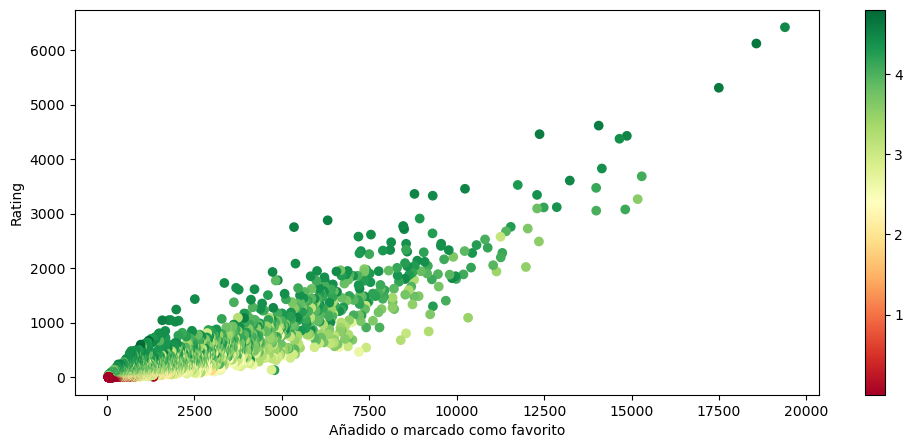

In [29]:
fig = plt.figure(figsize=(12,5))
plt.scatter(x=added , y=reviews_count , c= rating , cmap ='RdYlGn')
plt.colorbar(ticks =[1,2,3,4,5])
plt.xlabel('Añadido o marcado como favorito')
plt.ylabel('Rating')

In [30]:
# en el grafico podemos llegar a concluir a simple vista que el juego entre mas reseñas resiva es mas
#probable que tenga mejor calificaion

In [31]:
#Grafico de torta

In [32]:
#observamos la disrtibucion de las calificaciones entre 1-5

In [33]:
rangos =[1,2,3,4,5]
calificaciones_agrupadas = pd.cut(df_games['Rating'] , rangos ,right= False,include_lowest= True)
conteo_calificaciones = calificaciones_agrupadas.value_counts().sort_index()

(-1.1018399152902028,
 1.1386384234950644,
 -1.1975973230059778,
 1.1046474915717133)

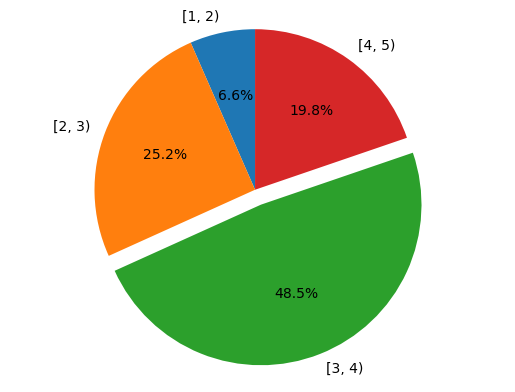

In [34]:
explode=[0,0,0.1,0]
plt.pie(conteo_calificaciones, labels = conteo_calificaciones.index, autopct='%1.1f%%' , startangle=90 , explode=explode)
plt.axis('equal')


In [35]:
#Generar un gráfico de líneas que muestre la evolución de las calificaciones a lo largo del tiempo.

In [36]:
df_años = df_games.groupby('Year')['Rating'].mean().reset_index()

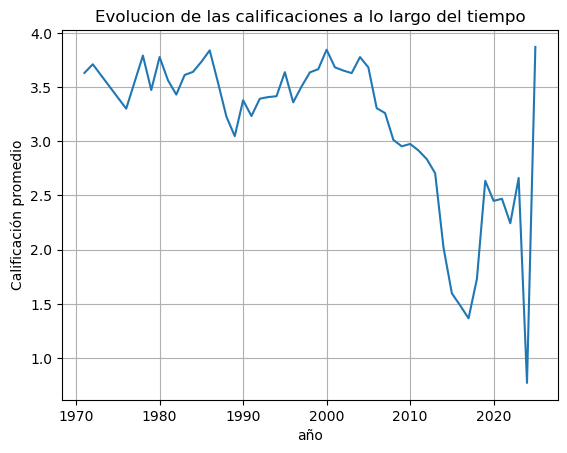

In [37]:
plt.plot(df_años['Year'],df_años['Rating'])
plt.xlabel('año')
plt.ylabel('Calificación promedio')
plt.title('Evolucion de las calificaciones a lo largo del tiempo')
plt.grid(True)

In [44]:
columns = ['Id', 'Added', 'Playtime', 'Reviews_count', 'Ratings-count', 'Rating', 'Year']
correlation_matrix = df_games[columns].corr()

<Axes: >

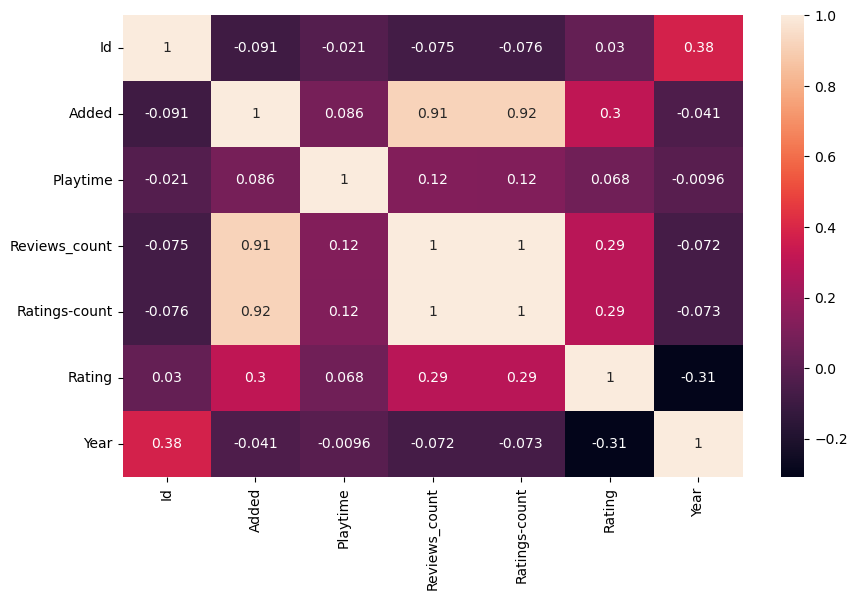

In [45]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)

In [40]:
#Realizar pruebas de hipótesis para determinar si hay diferencias significativas entre el tiempo de juego y los años trascurridos

In [125]:
modelo_anova = ols('Playtime ~ C(Year)',data=df_games).fit()
tabla_anova = sm.stats.anova_lm(modelo_anova)
print('Tabla anova')
print(tabla_anova)

Tabla anova
               df        sum_sq    mean_sq         F    PR(>F)
C(Year)      50.0  1.415030e+04  283.00591  2.223166  0.000002
Residual  19251.0  2.450625e+06  127.29857       NaN       NaN


In [126]:
#La tabla ANOVA muestra resultados estadísticos para evaluar si hay diferencias significativas en el tiempo de juego entre los diferentes años. El valor p extremadamente pequeño (0.000002) indica que existen diferencias significativas en el tiempo de juego en función del año.
#Esto significa que el año tiene un impacto estadísticamente significativo en el tiempo de juego. En otras palabras, hay evidencia para afirmar que los diferentes años tienen un efecto significativo en la cantidad de tiempo que se dedica al juego.
#En resumen, los resultados de la tabla ANOVA sugieren que el año tiene un efecto significativo en el tiempo de juego, lo que implica que a lo largo de los años ha habido cambios en la cantidad de tiempo que las personas dedican a jugar

In [136]:
X=df_games[['Playtime']]
y=df_games[['Rating']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [137]:
##Ajustar un modelo de regresión para predecir las calificaciones en función de otras variables, como el tiempo de juego

In [138]:
#creamos el modelo de regresion lineal

In [139]:
modelo_regresion = LinearRegression()

In [140]:
#entrenamos el modelo

In [141]:
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [142]:
#realizamos predicciones

In [144]:
predicciones = modelo_regresion.predict(X_test)

In [145]:
#evaluamos el modelo

In [147]:
mse= mean_squared_error(y_test,predicciones)
r2 = r2_score(y_test, predicciones)

In [148]:
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R2):", r2)

Error cuadrático medio (MSE): 2.759300524698891
Coeficiente de determinación (R2): 0.005119598223942479


In [149]:
#Error cuadrático medio (MSE): El MSE es una medida de la calidad del ajuste del modelo. Representa el promedio de los errores cuadráticos entre las predicciones del modelo y los valores reales. Cuanto menor sea el valor del MSE, mejor será el ajuste del modelo a los datos. En tu caso, el MSE es de 2.7593, lo que indica que hay un nivel moderado de error en las predicciones del modelo.

#Coeficiente de determinación (R2): El coeficiente de determinación, también conocido como R cuadrado, es una medida de qué tan bien se ajusta el modelo a los datos en comparación con un modelo de línea base. El R cuadrado varía entre 0 y 1, donde 1 indica un ajuste perfecto del modelo. En tu caso, el R cuadrado es de 0.0051, lo que significa que solo aproximadamente el 0.51% de la variabilidad en la variable objetivo se explica por el modelo. Esto indica que el modelo tiene una capacidad muy limitada para predecir las calificaciones basado en la variable de tiempo de juego.

#En resumen, los resultados sugieren que el modelo de regresión lineal ajustado no tiene un buen ajuste a los datos y muestra una capacidad limitada para predecir las calificaciones en función del tiempo de juego. Es posible que se requiera una exploración adicional y una selección de características más adecuada para mejorar el rendimiento del modelo.